In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('ds_salary.csv')

# Problem 1

Start by plotting and describing the general shape of the salary data. This initial step sets the foundation for your analysis.

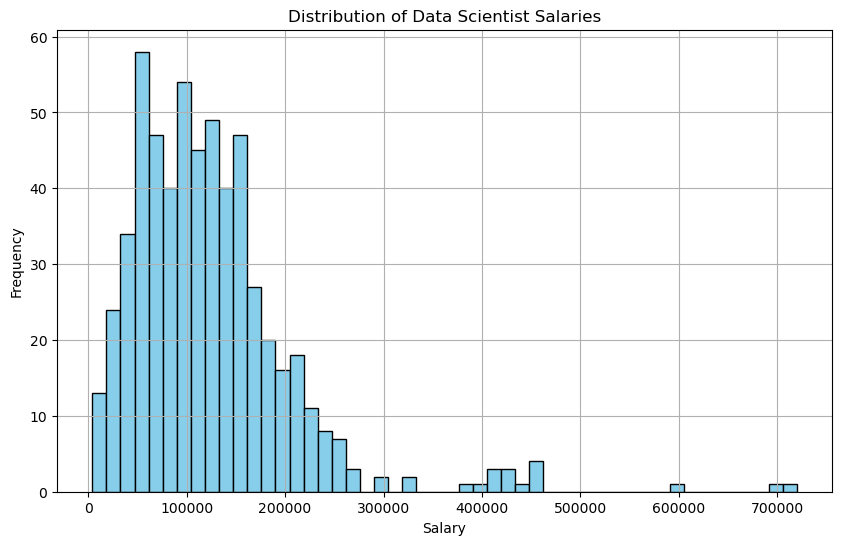

count       581.000000
mean     123685.096386
std       85286.402256
min        4000.000000
25%       67000.000000
50%      110000.000000
75%      157000.000000
max      720000.000000
Name: salary, dtype: float64

In [3]:
df.head()

plt.figure(figsize=(10,6))
plt.hist(df['salary'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Data Scientist Salaries')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

df['salary'].describe()


***

The salary data for these 581 data scientists follows a right-skewed, unimodal distribution. The mean salary is \\$123,685, but the median salary is lower at \\$110,000, indicating the presence of some high outliers that raise the average. The minimum salary is \\$4,000, while the maximum salary reaches \\$720,000, showing a wide range of salary values.

Most salaries fall between \\$67,000 and \\$157,000, with an interquartile range of \\$90,000. The standard deviation of \\$85,286 also highlights significant variation in salaries. The right-skewness is driven by a few extremely high salaries, as most of the data is concentrated below \\$200,000.

***

# Problem 2

Investigate how experience influences data scientist salaries. Create visualizations or
tables to illustrate any trends or patterns.

<Figure size 1000x600 with 0 Axes>

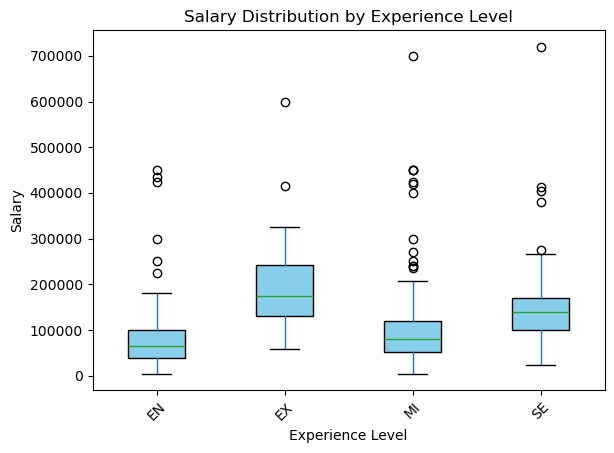

,Experience Level,Average Salary
0,EN,84397.200000
1,EX,204155.000000
2,MI,103480.437811
3,SE,142566.625455


In [4]:
plt.figure(figsize=(10,6))
df.boxplot(column='salary', by='experience_level', grid=False, patch_artist=True, boxprops=dict(facecolor='skyblue'))
plt.title('Salary Distribution by Experience Level')
plt.suptitle('') 
plt.xlabel('Experience Level')
plt.ylabel('Salary')
plt.xticks(rotation=45)
plt.show()

experience_salary_table = df.groupby('experience_level')['salary'].mean().reset_index()
experience_salary_table.columns = ['Experience Level', 'Average Salary']


display(experience_salary_table)

***

Effect of Experience on Salary: Experience has a clear influence on salary, with more experienced data scientists earning significantly more:

Entry-level (EN) workers earn an average salary of \\$84,397.
Mid-level (MI) professionals average \\$103,480, while senior (SE) professionals average \\$142,566.
Experienced (EX) professionals earn the highest, with an average of \\$204,155.

***

# Problem 3

# Problem 4

# Problem 5
Investigate potential interactions between the three factors (experience, company size, and job title). Create a two-way table that displays essential statistics at the intersection of two variables. For instance, construct a table with job titles on the left, company sizes at the top, and each cell representing the mean salary for each job title/company size combination.

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

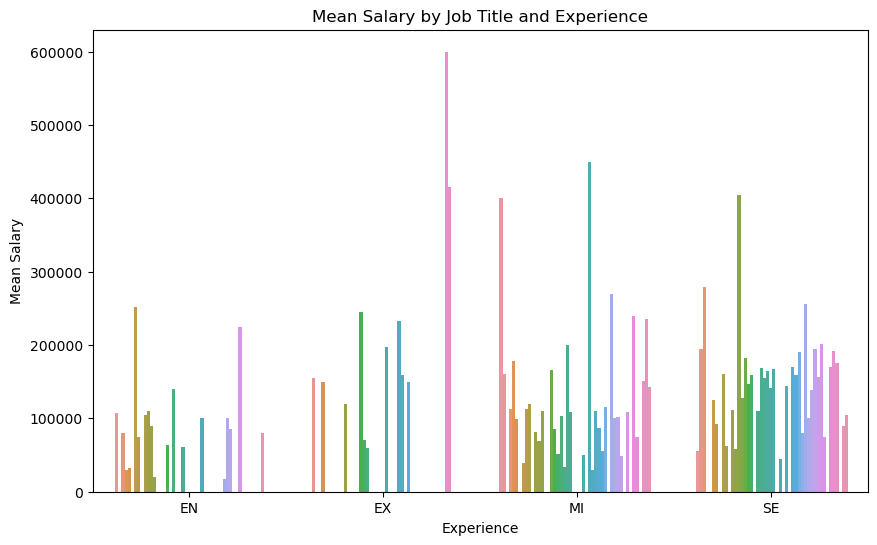

In [61]:
trimmed_df = df[['experience_level', 'company_size', 'job_title', 'salary']] 
pivot_table = trimmed_df.pivot_table(index='experience_level', 
                             columns='job_title', 
                             values='salary', 
                             aggfunc='mean')

# Unstack the pivot table to make it suitable for a bar plot
pivot_table_unstacked = pivot_table.unstack().reset_index()
pivot_table_unstacked.columns = ['Job Title', 'Experience', 'Mean Salary']

# Plot bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Experience', y='Mean Salary', hue='Job Title', data=pivot_table_unstacked)
plt.title('Mean Salary by Job Title and Experience')
plt.legend().remove()
plt.show()

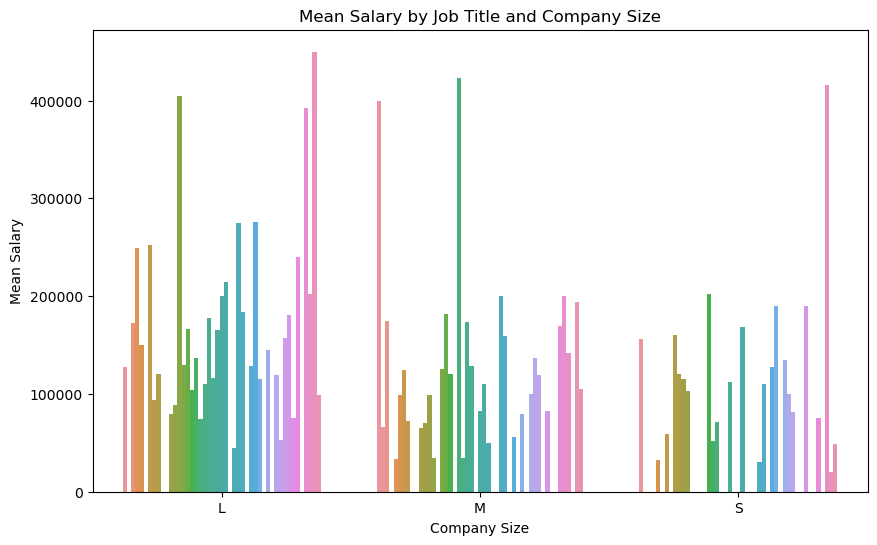

In [62]:
pivot_table = trimmed_df.pivot_table(index='company_size', 
                             columns='job_title', 
                             values='salary', 
                             aggfunc='mean')

# Unstack the pivot table to make it suitable for a bar plot
pivot_table_unstacked = pivot_table.unstack().reset_index()
pivot_table_unstacked.columns = ['Job Title', 'Company Size', 'Mean Salary']

# Plot bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Company Size', y='Mean Salary', hue='Job Title', data=pivot_table_unstacked)
plt.legend(prop={'size':6}).remove()
plt.title('Mean Salary by Job Title and Company Size')
plt.show()

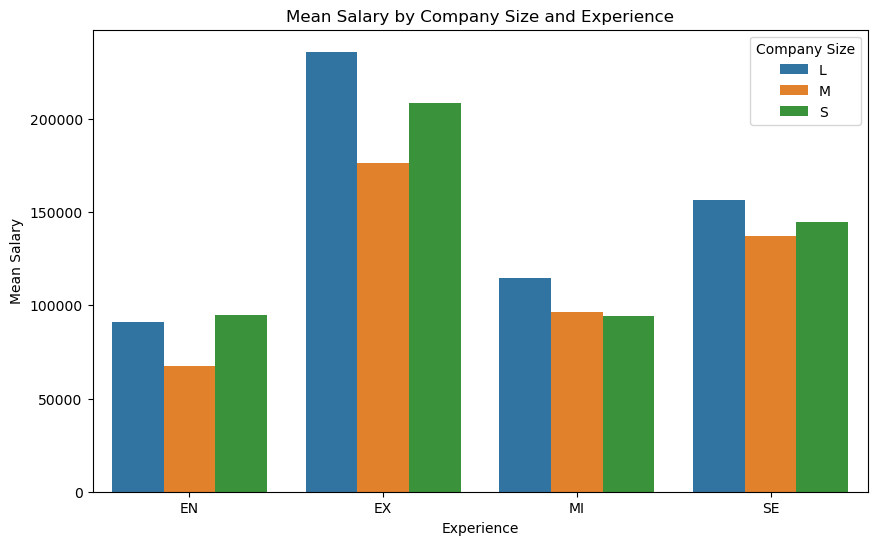

In [63]:
pivot_table = trimmed_df.pivot_table(index='experience_level', 
                             columns='company_size', 
                             values='salary', 
                             aggfunc='mean')

# Unstack the pivot table to make it suitable for a bar plot
pivot_table_unstacked = pivot_table.unstack().reset_index()
pivot_table_unstacked.columns = ['Company Size', 'Experience', 'Mean Salary']

# Plot bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Experience', y='Mean Salary', hue='Company Size', data=pivot_table_unstacked)
plt.title('Mean Salary by Company Size and Experience')
plt.show()

# Problem 6